# Exploratory Data Analysis

### Importing the required libraries and the dataset

In [13]:
import  pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('../data/raw/transactions.csv')

###  Dataset Summary

In [15]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
data.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [17]:
# Checking for missing values and duplicates

print("The number of missing values in the data is: \n" , data.isnull().sum())
print("The number of duplicates in the data is: " , data.duplicated().sum())

The number of missing values in the data is: 
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
The number of duplicates in the data is:  0


- There are no missing values nor duplicates in the dataset
- 11 variables: will all of them be used?
- We can directly see that data is pretty much unbalanced, since most of our observations are valid transactions

### Some insights on the origin and the destination of fraudulent transactions

In [18]:
new_dataset = data.copy()
new_dataset["transaction_endpoints"] = np.nan

In [19]:
conditions = [
    (data['nameOrig'].str.contains('C') & data['nameDest'].str.contains('C')),
    (data['nameOrig'].str.contains('C') & data['nameDest'].str.contains('M')),
    (data['nameOrig'].str.contains('M') & data['nameDest'].str.contains('C')),
    (data['nameOrig'].str.contains('M') & data['nameDest'].str.contains('M'))
]

choices = ['CC', 'CM', 'MC', 'MM']

new_dataset['transaction_endpoints'] = np.select(conditions, choices, default='Unknown')

In [20]:
new_dataset.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transaction_endpoints
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,CM
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,CM


In [21]:
print("Fraud transactions by endpoints: \n",new_dataset[new_dataset['isFraud'] == 1].transaction_endpoints.value_counts())
print("\n Valid transactions by endpoints: \n",new_dataset[new_dataset['isFraud'] == 0].transaction_endpoints.value_counts())

Fraud transactions by endpoints: 
 transaction_endpoints
CC    8213
Name: count, dtype: int64

 Valid transactions by endpoints: 
 transaction_endpoints
CC    4202912
CM    2151495
Name: count, dtype: int64


We can see here that only "Customer to customer" transactions are fraudulent

<Axes: xlabel='transaction_endpoints'>

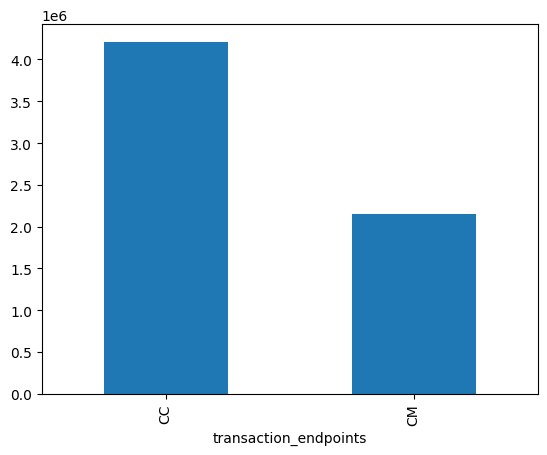

In [22]:
new_dataset['transaction_endpoints'].value_counts().plot(kind='bar')

In [23]:
new_dataset.drop(['transaction_endpoints'], axis=1, inplace=True)

### Insights on transaction type

In [24]:
print("Fraud transactions by type: \n",new_dataset[new_dataset['isFraud'] == 1].type.value_counts())
print("\n Valid transactions by type: \n",new_dataset[new_dataset['isFraud'] == 0].type.value_counts())

Fraud transactions by type: 
 type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

 Valid transactions by type: 
 type
CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: count, dtype: int64


<Axes: xlabel='type'>

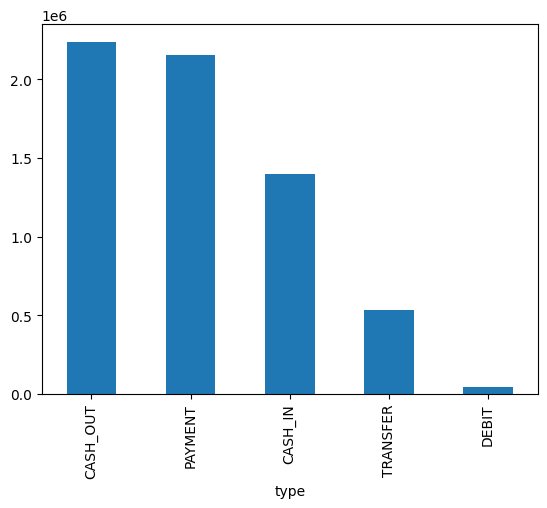

In [26]:
new_dataset['type'].value_counts().plot(kind='bar')

<Axes: xlabel='type'>

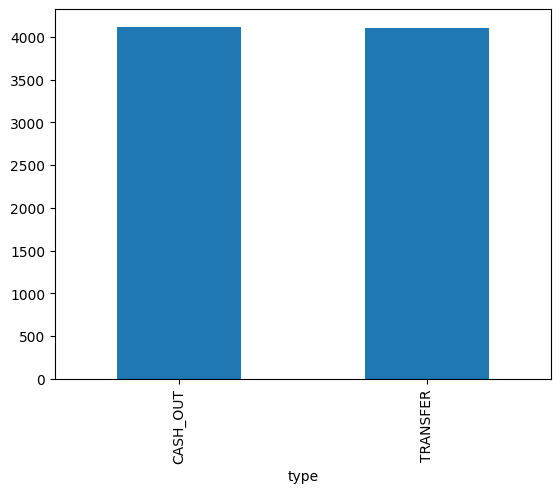

In [27]:
new_dataset[new_dataset['isFraud'] == 1].type.value_counts().plot(kind='bar')

Here we can see that only CASH_OUT and TRANSFER transactions are fraudulent. According to the description of the dataset: "This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system." 

### Subsetting data according to our transaction type 